In [33]:
# Importer les bibliothèques nécessaires
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, mean_squared_error
import pandas as pd
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
import numpy as np

In [23]:
# file csv to panda

nom_du_fichier_csv = 'Python_files/csv_files/retard_train_bdd_clean.csv'

data = pd.read_csv(nom_du_fichier_csv)

In [24]:
#choose here the label you want to train for among the following list;["prct_cause_infra","prct_cause_gestion_trafic","prct_cause_materiel_roulant","prct_cause_prise_en_charge_voyageurs","prct_cause_externe","prct_cause_gestion_gare"]:

label = "prct_cause_infra"


data_prct = (
    data.copy()
        .drop(
            ["prct_cause_infra","prct_cause_gestion_trafic","prct_cause_materiel_roulant","prct_cause_prise_en_charge_voyageurs","prct_cause_externe","prct_cause_gestion_gare"],
            axis=1,
        )
    )

y = data["prct_cause_infra"]
X = data_prct

# Diviser le jeu de données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Créer la pipeline pour la régression linéaire
linear_regression_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Vous pouvez omettre cette étape si elle n'est pas nécessaire
    ('linear_regression', LinearRegression())  # Régression linéaire
])

In [26]:
# Créer la pipeline pour la régression Random Forest
random_forest_regression_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('random_forest', RandomForestRegressor(n_estimators=100, random_state=42))
])


In [27]:
# Créer la pipeline pour la Support Vector Regression (SVR)
svr_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svr', SVR())
])


In [28]:
# Créer la pipeline pour les K-plus proches voisins (K-NN) en régression
knn_regression_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsRegressor(n_neighbors=5))  # K-plus proches voisins en régression avec 5 voisins
])

In [29]:
# Entraîner les modèles avec les différentes pipelines

linear_regression_pipeline.fit(X_train, y_train)
random_forest_regression_pipeline.fit(X_train, y_train)
svr_pipeline.fit(X_train, y_train)
knn_regression_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('knn', KNeighborsRegressor())])

In [30]:
# Évaluer la performance des modèles de régression
linear_regression_predictions = linear_regression_pipeline.predict(X_test)
mse_linear_regression = mean_squared_error(y_test, linear_regression_predictions)
print(f"Erreur quadratique moyenne (MSE) de la régression linéaire : {mse_linear_regression:.2f}")

random_forest_mse = mean_squared_error(y_test, random_forest_regression_pipeline.predict(X_test))
print(f"Erreur quadratique moyenne (MSE) du modèle Random Forest en régression : {random_forest_mse:.2f}")

svr_mse = mean_squared_error(y_test, svr_pipeline.predict(X_test))
print(f"Erreur quadratique moyenne (MSE) du modèle SVR : {svr_mse:.2f}")

knn_mse = mean_squared_error(y_test, knn_regression_pipeline.predict(X_test))
print(f"Erreur quadratique moyenne (MSE) du modèle K-plus proches voisins en régression : {knn_mse:.2f}")

Erreur quadratique moyenne (MSE) de la régression linéaire : 214.31
Erreur quadratique moyenne (MSE) du modèle Random Forest en régression : 179.21
Erreur quadratique moyenne (MSE) du modèle SVR : 235.50
Erreur quadratique moyenne (MSE) du modèle K-plus proches voisins en régression : 241.69


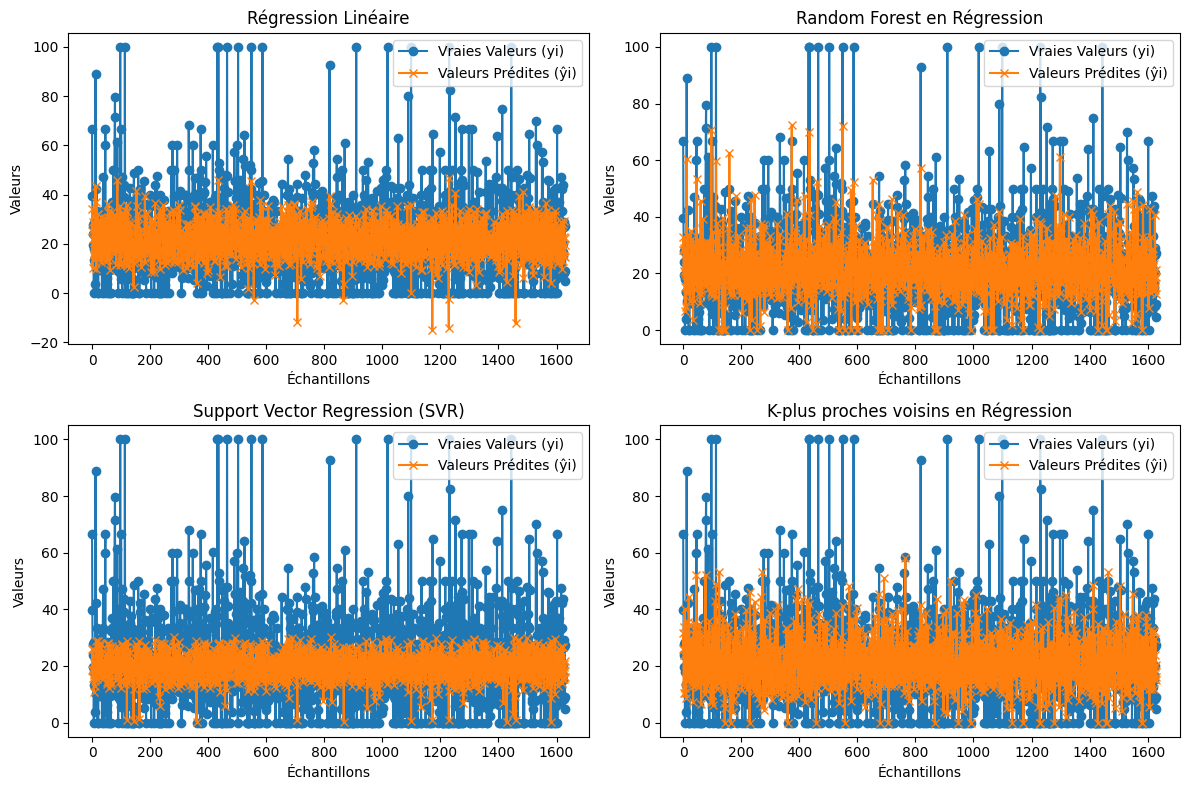

In [34]:
# Prédire les valeurs pour chaque modèle
linear_regression_predictions = linear_regression_pipeline.predict(X_test)
random_forest_predictions = random_forest_regression_pipeline.predict(X_test)
svr_predictions = svr_pipeline.predict(X_test)
knn_predictions = knn_regression_pipeline.predict(X_test)

# Tracer les courbes yi vs ŷi pour chaque modèle
plt.figure(figsize=(12, 8))

# Modèle de régression linéaire
plt.subplot(221)
plt.plot(np.arange(len(y_test)), y_test, label="Vraies Valeurs (yi)", marker='o')
plt.plot(np.arange(len(y_test)), linear_regression_predictions, label="Valeurs Prédites (ŷi)", marker='x')
plt.xlabel("Échantillons")
plt.ylabel("Valeurs")
plt.title("Régression Linéaire")
plt.legend()

# Modèle Random Forest en régression
plt.subplot(222)
plt.plot(np.arange(len(y_test)), y_test, label="Vraies Valeurs (yi)", marker='o')
plt.plot(np.arange(len(y_test)), random_forest_predictions, label="Valeurs Prédites (ŷi)", marker='x')
plt.xlabel("Échantillons")
plt.ylabel("Valeurs")
plt.title("Random Forest en Régression")
plt.legend()

# Modèle SVR
plt.subplot(223)
plt.plot(np.arange(len(y_test)), y_test, label="Vraies Valeurs (yi)", marker='o')
plt.plot(np.arange(len(y_test)), svr_predictions, label="Valeurs Prédites (ŷi)", marker='x')
plt.xlabel("Échantillons")
plt.ylabel("Valeurs")
plt.title("Support Vector Regression (SVR)")
plt.legend()

# Modèle K-plus proches voisins en régression
plt.subplot(224)
plt.plot(np.arange(len(y_test)), y_test, label="Vraies Valeurs (yi)", marker='o')
plt.plot(np.arange(len(y_test)), knn_predictions, label="Valeurs Prédites (ŷi)", marker='x')
plt.xlabel("Échantillons")
plt.ylabel("Valeurs")
plt.title("K-plus proches voisins en Régression")
plt.legend()

plt.tight_layout()
plt.show()